# Data Loading

In [3]:
import pandas as pd
df=pd.read_csv('adult.csv') #read the dataset

In [4]:
print(df.head())  #It will display the first few row of a dataset

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [5]:
print(df.describe())  #Display summary statistics of a numerical value

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [6]:

df.isnull().sum()  #finding the total number of missing values in each column of the DataFrame.


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
print (df.dtypes) #Check the datatypes of a coloumn

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [8]:
#gives the total number of categorical columns and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Numerical columns: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


# Handling Missing Values

In [9]:

# Handling missing values for categorical columns
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

# Handling missing values for numerical columns
df['hours-per-week'].fillna(df['hours-per-week'].mean(), inplace=True)


/tmp/ipykernel_28510/4172698108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
/tmp/ipykernel_28510/4172698108.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

# Manipulating the Data

In [10]:


import pandas as pd
df_selected = df[['age', 'workclass', 'education', 'occupation', 'hours-per-week', 'native-country']]

# Rename columns
df_selected.rename(columns={'hours-per-week': 'hours_per_week'}, inplace=True)

# Delete a column
del df_selected['native-country']

print(df_selected.head())


   age  workclass     education         occupation  hours_per_week
0   25    Private          11th  Machine-op-inspct              40
1   38    Private       HS-grad    Farming-fishing              50
2   28  Local-gov    Assoc-acdm    Protective-serv              40
3   44    Private  Some-college  Machine-op-inspct              40
4   18          ?  Some-college                  ?              30


/tmp/ipykernel_28510/3047474576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns={'hours-per-week': 'hours_per_week'}, inplace=True)


# Grouping

In [11]:

# Grouping by single column
grouped_data = df.groupby('workclass')
print(grouped_data.head())

# Grouping by multiple columns
grouped_data = df.groupby(['workclass', 'education'])
print(grouped_data.head())

# Grouping with custom aggregation function
def my_agg_func(df):
  return {'min_age': df['age'].min(), 'max_age': df['age'].max()}

grouped_data = df.groupby('workclass').apply(my_agg_func)
print(grouped_data)


       age         workclass  fnlwgt     education  educational-num  \
0       25           Private  226802          11th                7   
1       38           Private   89814       HS-grad                9   
2       28         Local-gov  336951    Assoc-acdm               12   
3       44           Private  160323  Some-college               10   
4       18                 ?  103497  Some-college               10   
5       34           Private  198693          10th                6   
6       29                 ?  227026       HS-grad                9   
7       63  Self-emp-not-inc  104626   Prof-school               15   
8       24           Private  369667  Some-college               10   
11      36       Federal-gov  212465     Bachelors               13   
13      58                 ?  299831       HS-grad                9   
16      20         State-gov  444554  Some-college               10   
22      72                 ?  132015       7th-8th                4   
25    

/tmp/ipykernel_28510/2507453536.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = df.groupby('workclass').apply(my_agg_func)


# Visualization Using Matplotlib

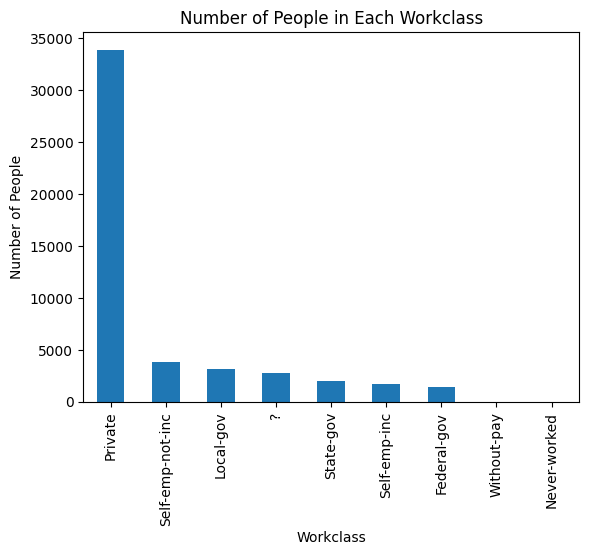

In [12]:

import matplotlib.pyplot as plt

#bar chart of the number of people in each workclass
df['workclass'].value_counts().plot(kind='bar')
plt.title('Number of People in Each Workclass')
plt.xlabel('Workclass')
plt.ylabel('Number of People')
plt.show()


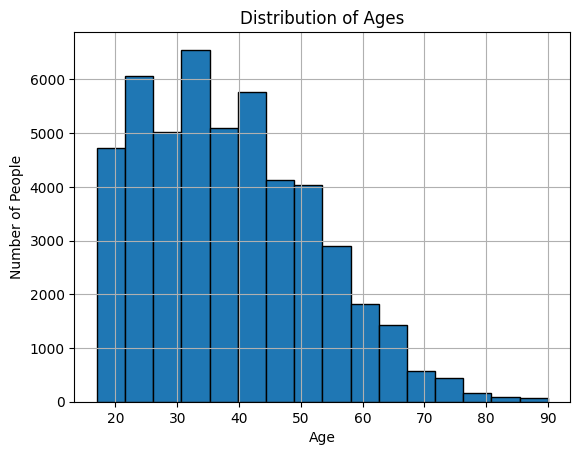

In [13]:
# Histogram of the ages of people in the dataset
df['age'].hist(bins=16, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

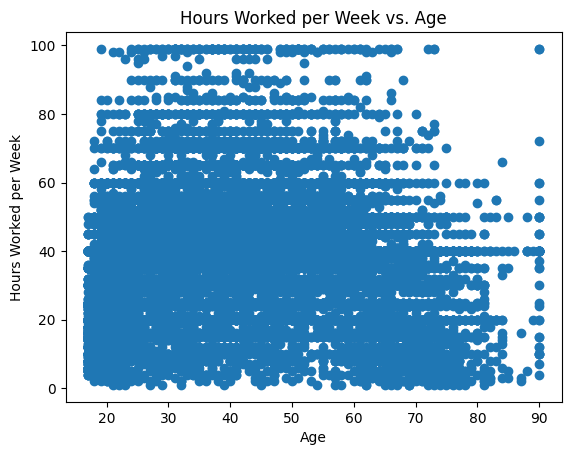

In [14]:
# Scatter plot of hours worked per week vs. age
plt.scatter(df['age'], df['hours-per-week'])
plt.title('Hours Worked per Week vs. Age')
plt.xlabel('Age')
plt.ylabel('Hours Worked per Week')
plt.show()

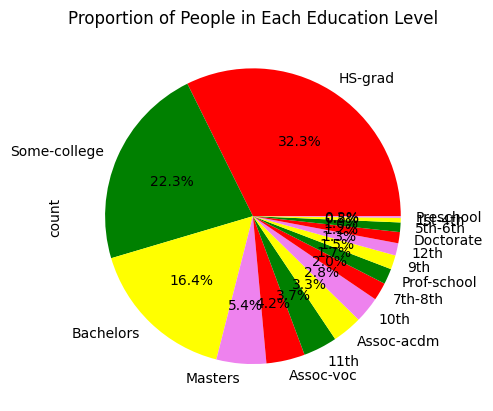

In [15]:
#pie chart of the proportion of people in each education level
df['education'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green', 'yellow', 'violet'])
plt.title('Proportion of People in Each Education Level')
plt.show()


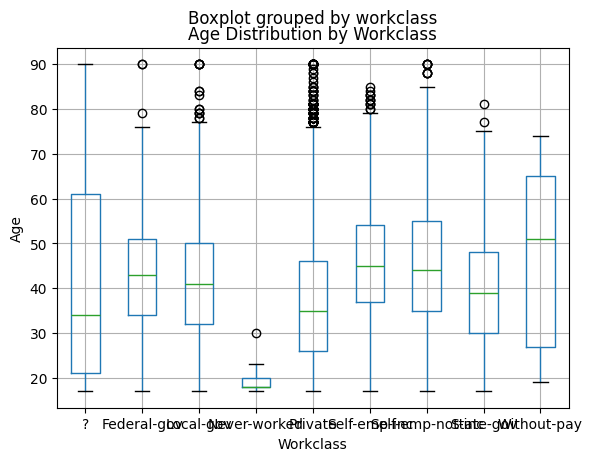

In [16]:
# boxplot of the age distribution for each workclass
df.boxplot(column='age', by='workclass')
plt.title('Age Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Age')
plt.show()

# Visualization Using Seaborn


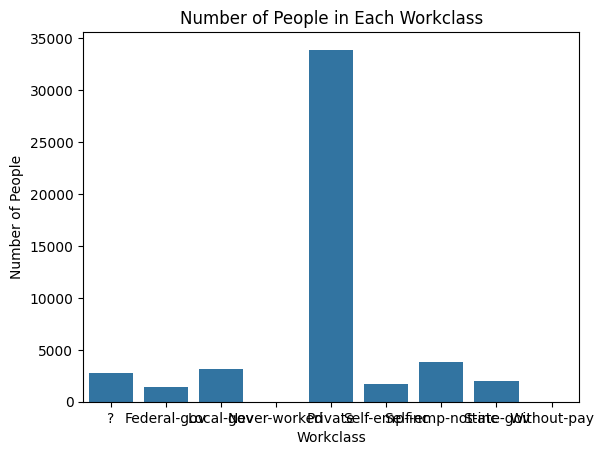

In [19]:
# using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# bar chart of the number of people in each workclass
sns.barplot(x='workclass', y='count', data=df.groupby('workclass').size().reset_index(name='count'))
plt.title('Number of People in Each Workclass')
plt.xlabel('Workclass')
plt.ylabel('Number of People')
plt.show()



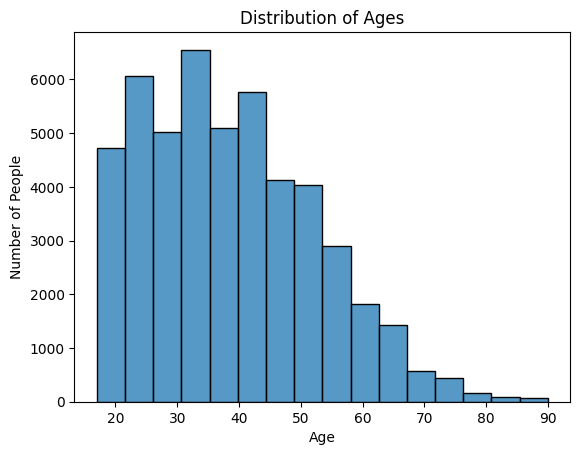

In [20]:
#  histogram of the ages of people in the dataset
sns.histplot(df['age'], bins=16, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

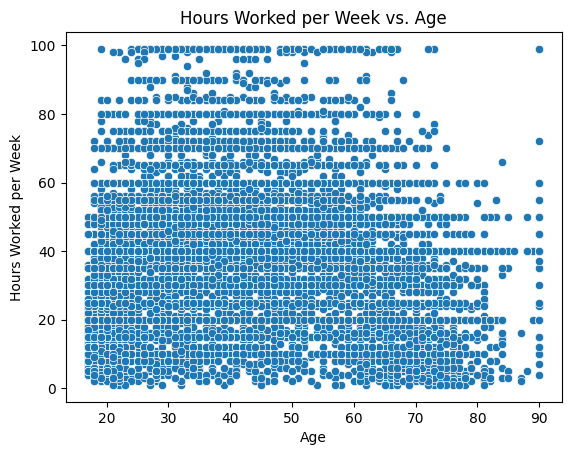

In [21]:
#  scatter plot of hours worked per week vs. age
sns.scatterplot(x='age', y='hours-per-week', data=df)
plt.title('Hours Worked per Week vs. Age')
plt.xlabel('Age')
plt.ylabel('Hours Worked per Week')
plt.show()

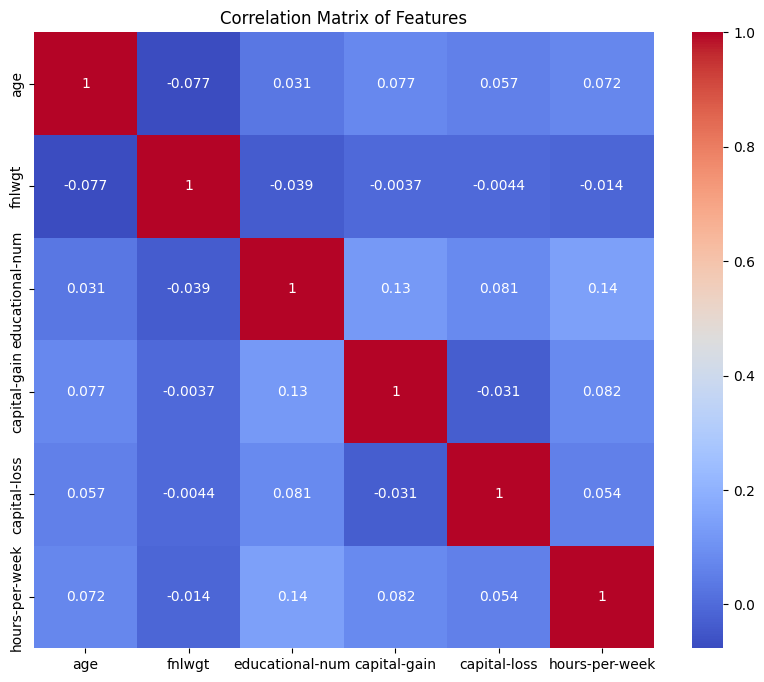

In [23]:
# List of categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Drop categorical columns
df_numeric = df.drop(categorical_columns, axis=1)

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


# Findings And Conclusions


* The dataset contains information about adults, including their age, workclass, education, occupation, hours worked per week, and native country.
* There are missing values in the workclass, occupation, native-country, and hours-per-week columns.
* The missing values were imputed using the mode for categorical columns and the mean for numerical columns.
* The dataset was then grouped by workclass and education level.
* A custom aggregation function was used to calculate the minimum and maximum age for each workclass.
* Several visualizations were created to explore the data, including bar charts, histograms, scatter plots, pie charts, and boxplots.
* The correlation matrix of the features was also calculated.
